In [11]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm

from scipy.optimize import minimize
from statsmodels.base.model import GenericLikelihoodModel
from scipy.optimize import minimize
from matplotlib import pyplot as plt


%matplotlib inline



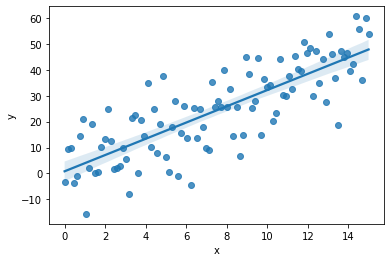

In [45]:
# generate data
N = 100
x = np.linspace(0,15,N)
ϵ = np.random.normal(loc = 2.0, scale = 10.0, size = N)
y = 3*x + ϵ
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

sns.regplot(df['x'],df['y'])

In [46]:
X = df[['constant','x']]

sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     175.8
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.35e-23
Time:                        21:59:44   Log-Likelihood:                -374.51
No. Observations:                 100   AIC:                             753.0
Df Residuals:                      98   BIC:                             758.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.8375      2.053      0.408      0.684      -3.237       4.912
x              3.1358      0.236     13.260      0.000       2.666       3.605
==============================================================================
Omnibus:                        1.682   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.669
Skew:                          -0.238   Prob(JB):                        0.434
Kurtosis:                       2.584   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
# define likelihood function
def MLERegression(params):
    intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
    yhat = intercept + beta*x # predictions# next, we flip the Bayesian question
    # compute PDF of observed values normally distributed around mean (yhat)
    # with a standard deviation of sd
    negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )# return negative LL
    return(negLL)

In [48]:
# let’s start with some random coefficient guesses and optimize

guess = np.array([5,5,2])

results = minimize(MLERegression, guess, method = 'Nelder-Mead',  options={'disp': True})

print(results)

Optimization terminated successfully.
         Current function value: 374.511296
         Iterations: 119
         Function evaluations: 210
 final_simplex: (array([[ 0.83753938,  3.13576809, 10.23868253],
       [ 0.83746345,  3.13577793, 10.23870128],
       [ 0.83753756,  3.13577186, 10.23872525],
       [ 0.83748452,  3.13578119, 10.23868289]]), array([374.51129577, 374.51129577, 374.51129577, 374.51129577]))
           fun: 374.5112957664297
       message: 'Optimization terminated successfully.'
          nfev: 210
           nit: 119
        status: 0
       success: True
             x: array([ 0.83753938,  3.13576809, 10.23868253])


In [49]:
# drop results into df and round to match statsmodels

resultsdf = pd.DataFrame({'coef':results['x']})

resultsdf.index=['constant','x','sigma']   

np.round(resultsdf.head(3), 2)

,coef
constant,0.84
x,3.14
sigma,10.24


In [51]:
results['x']

array([ 0.83753938,  3.13576809, 10.23868253])